In [36]:
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import os
import json

In [37]:
os.chdir("D:/Data")

In [38]:
# labels.json 파일 로드
with open('./final/dataset/train//labels.json', 'r') as fp:
  e = json.load(fp)

# images 키를 데이터프레임으로 반환. (분석 불필요한 칼럼은 제거)
images = pd.DataFrame(e['images']).drop(labels = ['license', 'coco_url', 'height', 'width'], axis = 1)

# annotations 키를 데이터프레임으로 반환. (분석 불필요한 칼럼은 제거)
annotations = pd.DataFrame(e['annotations']).drop(labels = ['id', 'area', 'iscrowd'], axis = 1)

for i in annotations['bbox']: # coco format bbox 좌표 [x1, y1, w, h] 를 [x1, y1, x2, y2] 형태로 변환
    i[2] = i[0] + i[2] # x2 = x1 + w
    i[3] = i[1] + i[3] # y2 = y1 + h

# x1, y1, x2, y2 좌표 각각의 리스트로 분리하여 저장한 하나의 리스트 반환
x = [list(map(lambda x: x[i],annotations.iloc[:, 2])) for i in range(4)]

# image_id와 ,x1, y1, x2, y2 값을 저장한 데이터프레임 생성
anno_res = pd.DataFrame({'id': annotations['image_id'],'x1': x[0], 'y1': x[1], 'x2': x[2], 'y2': x[3]})
# category_id를 저장한 데이터프레임 생성
anno_res_1 =  pd.DataFrame({'label' : annotations['category_id']})
# image_id, 640으로 나누어 정규화한 x1,y1,x2,y2 좌표, category_id 를 합쳐 데이터프레임 반환
anno_res = pd.concat([anno_res.iloc[:, 0], anno_res.iloc[:,1:5].apply(lambda x:x/640), anno_res_1], axis=1)

# image_id 기준으로 images 데이터프레임과 annotation 정보를 결합
train_pd = images.set_index('id').join(anno_res.set_index('id'))
# file_name 열을 ImageID로 명칭 변경
train_pd.rename(columns = {'file_name' : 'ImageID'}, inplace = True)

In [39]:
d = pd.DataFrame(e['images'])
d[d['id'] ==18481]

,id,file_name,height,width,license,coco_url
18480,18481,2bc-98546691a26e_jpg.rf.f1b5590eee5e19575a0613...,640,640,None,None


In [40]:
# labels.json 파일로부터 annotations 키를 d 데이터프레임으로 반환 
d = pd.DataFrame(e['annotations'])
# 카테고리 번호가 0인 데이터 중 임의로 30개 반환
d[d['category_id'] == 0].sample(n=30)

,id,image_id,category_id,bbox,area,iscrowd,IsTruncated,IsGroupOf,IsDepiction,IsOccluded,IsInside,supercategory
2521,2522,1751,0,"[62.08, 5.76, 902.4, 734.7202560000001]",612559.882322,0,False,False,False,True,False,NaN
3879,3880,2689,0,"[0.0, 130.56, 602.270083, 1023.3599999999999]",537706.730102,0,True,False,False,True,False,NaN
2353,2354,1630,0,"[0.0, 47.360256, 1004.8, 767.360256]",723456.000000,0,True,False,False,True,False,NaN
1828,1829,1276,0,"[152.000512, 193.600512, 691.2, 857.6]",358028.183962,0,False,False,False,True,False,NaN
1988,1989,1380,0,"[94.99991, 327.000064, 466.00002, 803.999744]",176966.933750,0,False,False,False,True,False,NaN
2028,2029,1413,0,"[82.56, 413.260078, 504.96, 682.359346]",113667.530803,0,True,False,False,True,False,NaN
2467,2468,1706,0,"[332.000256, 438.000204, 581.000192, 651.000006]",53036.937066,0,False,False,False,True,False,NaN
3097,3098,2142,0,"[106.88, 198.399744, 963.84, 617.600256]",359238.070764,0,False,False,False,True,False,NaN
3123,3124,2164,0,"[16.64, 405.571547, 277.76, 682.359346]",72274.830075,0,True,False,False,True,False,NaN
2772,2773,1918,0,"[0.0, 195.84, 492.8, 767.360256]",281645.182157,0,True,False,False,False,False,NaN


In [41]:
# train 데이터프레임에서 label 열의 값에 대한 빈도수를 구하고 category_id 기준 오름차순으로 정렬한 numpy 배열 생성
data_num = train_pd['label'].value_counts().sort_index().values

In [42]:
data_num

array([3930, 3378, 2408, 1745, 2618, 2577, 3241, 2848, 2661, 2774],
      dtype=int64)

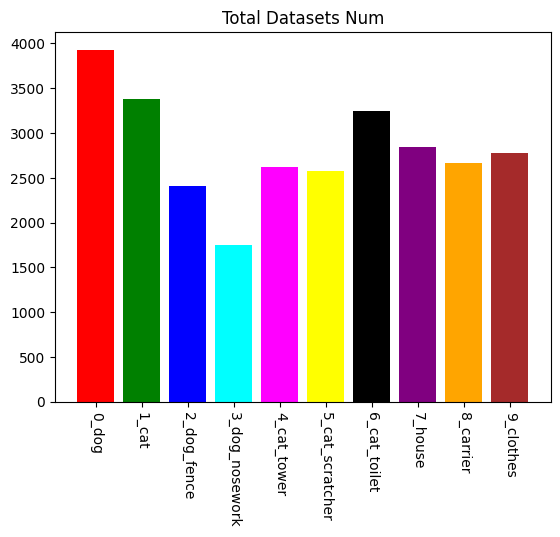

In [44]:
# data_num 배열을 기준으로 각 카테고리 별 annotation 갯수를 bar 그래프로 반환
classes = ['0_dog', '1_cat', '2_dog_fence', '3_dog_nosework', '4_cat_tower', '5_cat_scratcher', '6_cat_toilet', '7_house', '8_carrier','9_clothes']
colors = ['red', 'green', 'blue', 'cyan', 'magenta', 'yellow', 'black', 'purple', 'orange', 'brown']
plt.bar(classes, data_num, color=colors)
plt.xticks(rotation=-90)
plt.title('Total Datasets Num')
plt.savefig(f"D:/Data/final/dataset/train/class_chart.jpg")